In [1]:
%matplotlib inline
import deepdish as dd
import h5py
import numpy as np
from galaxy_analysis.plot.plot_styles import *
import matplotlib.pyplot as plt


/home/aemerick/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aemerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/sit

/home/aemerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", li

/home/aemerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, i

In [2]:
infile = '/home/aemerick/work/enzo_runs/sn_H2atten_H2sh/abundances.h5'

h5data    = h5py.File(infile,'r')
#zbins     = dd.io.load(infile,'/DD0500/CNM/mass_fraction/bins')
data_list = np.sort([x for x in h5data.keys() if 'DD' in x])

In [3]:
data = dd.io.load(infile)

In [17]:
newdict = {}

for x in data.keys():
    
    if 'DD02' in x:
        newdict[x] = data[x]

In [18]:
newdict.keys()

['DD0248',
 'DD0284',
 'DD0286',
 'DD0280',
 'DD0226',
 'DD0268',
 'DD0240',
 'DD0242',
 'DD0244',
 'DD0246',
 'DD0266',
 'DD0218',
 'DD0278',
 'DD0282',
 'DD0230',
 'DD0276',
 'DD0256',
 'DD0254',
 'DD0252',
 'DD0250',
 'DD0212',
 'DD0210',
 'DD0264',
 'DD0258',
 'DD0292',
 'DD0274',
 'DD0290',
 'DD0296',
 'DD0294',
 'DD0262',
 'DD0298',
 'DD0270',
 'DD0272',
 'DD0260',
 'DD0238',
 'DD0228',
 'DD0234',
 'DD0288',
 'DD0216',
 'DD0222',
 'DD0236',
 'DD0220',
 'DD0208',
 'DD0224',
 'DD0204',
 'DD0232',
 'DD0206',
 'DD0214',
 'DD0200',
 'DD0202']

In [4]:
import time

start = time.time()

dd.io.save('test.h5',data) #compression = ('zlib',9))

end = time.time()


print len(data.keys()), "%5.5E"%((end - start)/60.0)

380 8.93115E+00


In [14]:
d2   = h5py.File('test.h5','r')
print d2.keys()

[u'DD0120', u'DD0122', u'DD0124', u'DD0126', u'DD0128', u'DD0130', u'DD0132', u'DD0134', u'DD0136', u'DD0138', u'DD0140', u'DD0142', u'DD0144', u'DD0146', u'DD0148', u'DD0150', u'DD0152', u'DD0154', u'DD0156', u'DD0158', u'DD0160', u'DD0162', u'DD0164', u'DD0166', u'DD0168', u'DD0170', u'DD0172', u'DD0174', u'DD0176', u'DD0178', u'DD0180', u'DD0182', u'DD0184', u'DD0186', u'DD0188', u'DD0190', u'DD0192', u'DD0194', u'DD0196', u'DD0198', u'DD0200', u'DD0202', u'DD0204', u'DD0206', u'DD0208', u'DD0210', u'DD0212', u'DD0214', u'DD0216', u'DD0218', u'DD0220', u'DD0222', u'DD0224', u'DD0226', u'DD0228', u'DD0230', u'DD0232', u'DD0234', u'DD0236', u'DD0238', u'DD0240', u'DD0242', u'DD0244', u'DD0246', u'DD0248', u'DD0250', u'DD0252', u'DD0254', u'DD0256', u'DD0258', u'DD0260', u'DD0262', u'DD0264', u'DD0266', u'DD0268', u'DD0270', u'DD0272', u'DD0274', u'DD0276', u'DD0278', u'DD0280', u'DD0282', u'DD0284', u'DD0286', u'DD0288', u'DD0290', u'DD0292', u'DD0294', u'DD0296', u'DD0298', u'DD0300'

In [15]:
dd.io.save??

In [69]:
def get_mass_fraction(zdex=None, mf = None, data_names = data_list, fname = infile,
                          SN_element = 'O', AGB_element = 'Ba', bins = zbins,
                          norm_stat = 'median'):
    
    result = {'AGB' : np.zeros(np.size(data_names)),
              'SN'  : np.zeros(np.size(data_names)),
              'time' : np.zeros(np.size(data_names))}
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        SN  = dd.io.load(fname, '/' + dname + '/CNM/mass_fraction/' + SN_element + '_Fraction')
        AGB = dd.io.load(fname, '/' + dname + '/CNM/mass_fraction/' + AGB_element + '_Fraction')
        
        # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
        if (norm_stat is None) or (norm_stat == ""):
            SN_norm  = np.zeros(np.size(log_z))
            AGB_norm = np.zeros(np.size(log_z))
        else:
            SN_norm   = np.log10(SN[norm_stat])
            AGB_norm  = np.log10(AGB[norm_stat])
        
        # find the 1 dex limit
        if (not (zdex is None)):
            result['SN'][i]= 1.0 - np.interp(zdex, log_z - SN_norm, np.cumsum(SN['hist']))
            result['AGB'][i]= 1.0 - np.interp(zdex, log_z - AGB_norm, np.cumsum(AGB['hist']))
            
        else:
            result['SN'][i]  = np.interp(1.0-mf, np.cumsum( SN['hist']), log_z -  SN_norm)
            result['AGB'][i] = np.interp(1.0-mf, np.cumsum(AGB['hist']), log_z - AGB_norm)
            
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)
        
    result['time'] = result['time'] - result['time'][0]
    
    return result

In [51]:
SN  = dd.io.load('gas_abundances.h5', '/DD0500/CNM/mass_fraction/O_Fraction')

zval = np.log10(0.5*(zbins[1:]+zbins[:-1])) - np.log10(SN['median'])
xval = np.cumsum(SN['hist'])

print np.interp(1.0, zval, xval)

d = 'DD0640'

dd.io.load('gas_abundances.h5', '/'+d+'/general/Time')


0.994872561855


639.9999938633

In [55]:
result = get_mass_fraction(zdex=1.0)
result2 = get_mass_fraction(zdex=0.5)
result3 = get_mass_fraction(zdex=0.25)

[]

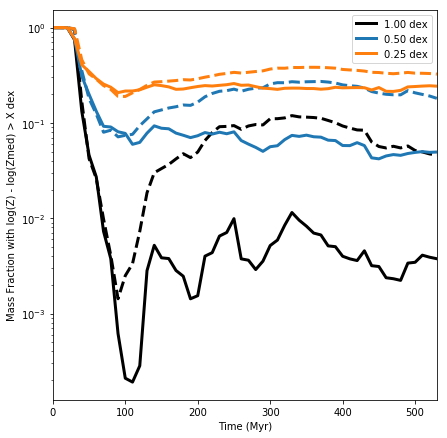

In [57]:
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

ax.plot(result['time'], result['SN'], lw = 3, color = 'black', label = '1.00 dex')
ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

ax.plot(result2['time'], result2['SN'], lw = 3, color = 'C0', label = '0.50 dex')
ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

ax.plot(result3['time'], result3['SN'], lw = 3, color = 'C1', label = '0.25 dex')
ax.plot(result3['time'], result3['AGB'], lw = 3, color = 'C1', ls = '--')

ax.legend(loc='best')


plt.tight_layout()

ax.set_xlim(result['time'][0], result['time'][-1])
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Mass Fraction with log(Z) - log(Zmed) > X dex')
ax.semilogy()

In [79]:
result  = get_mass_fraction(mf=0.1)
result2 = get_mass_fraction(mf=0.9)
result3  = get_mass_fraction(mf=0.25)
result4 = get_mass_fraction(mf=0.75)
result5  = get_mass_fraction(mf=0.01)
result6 = get_mass_fraction(mf=0.99)

(-1, 1)

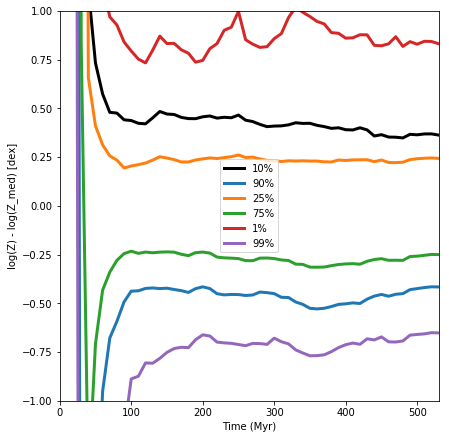

In [80]:
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

ax.plot(result['time'], result['SN'], lw = 3, color = 'black', label = '10%')
#ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

ax.plot(result2['time'], result2['SN'], lw = 3, color = 'C0', label = '90%')
#ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

ax.plot(result3['time'], result3['SN'], lw = 3, color = 'C1', label = '25%')
#ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

ax.plot(result4['time'], result4['SN'], lw = 3, color = 'C2', label = '75%')
#ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

ax.plot(result5['time'], result5['SN'], lw = 3, color = 'C3', label = '1%')
ax.plot(result6['time'], result6['SN'], lw = 3, color = 'C4', label = '99%')
ax.legend(loc='best')


plt.tight_layout()

ax.set_xlim(result['time'][0], result['time'][-1])
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('log(Z) - log(Z_med) [dex]')
ax.set_ylim(-1,1)

(-1, 1)

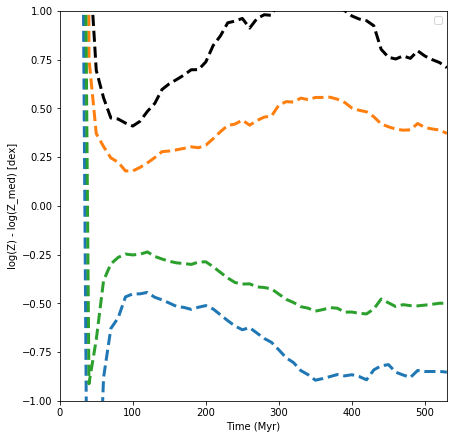

In [77]:
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

#ax.plot(result['time'], result['SN'], lw = 3, color = 'black', label = '10%')
ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

#ax.plot(result2['time'], result2['SN'], lw = 3, color = 'C0', label = '90%')
ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

#ax.plot(result3['time'], result3['SN'], lw = 3, color = 'C1', label = '25%')
ax.plot(result3['time'], result3['AGB'], lw = 3, color = 'C1', ls = '--')

#ax.plot(result4['time'], result4['SN'], lw = 3, color = 'C2', label = '75%')
ax.plot(result4['time'], result4['AGB'], lw = 3, color = 'C2', ls = '--')
ax.legend(loc='best')


plt.tight_layout()

ax.set_xlim(result['time'][0], result['time'][-1])
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('log(Z) - log(Z_med) [dex]')
ax.set_ylim(-1,1)